In [85]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
import os
from itertools import cycle, islice
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
path = '/home/diya/Documents/rat-fes/data/filipe_data/N5'
filenames = os.listdir(path)
print(filenames)

['N5_171130_No Obstacles_s.mat', 'N5_171016_No Obstacles_s.mat', 'N5_171001_No Obstacles_s.mat', 'N5_170929_No Obstacles_s.mat']


In [87]:
temp_datasets = []
temp_var_names = []

for file in filenames:
    temp_datasets.append(path+'/'+file)
    temp_var_names.append(file.split('_')[0]+file.split('_')[1])

datasets = sorted(temp_datasets)
var_names = sorted(temp_var_names)

In [88]:
var_names

['N5170929', 'N5171001', 'N5171016', 'N5171130']

In [89]:
cort_dict = {}
for i in range(len(datasets)):
    cort_dict[var_names[i]] = CortProcessor(datasets[i])

this is filipe data i belive
this is filipe data i belive
this is filipe data i belive
this is filipe data i belive


In [90]:
day0_decoder, vaffy, test_x, test_y = cort_dict[var_names[0]].decode_angles()

In [91]:
cca_dict = {}
for i in range(1, len(var_names)):
    print(var_names[0], var_names[i])
    cca_dict[var_names[i]] = CCAProcessor(cort_dict[var_names[0]], cort_dict[var_names[i]])


N5170929 N5171001
(12050,)
(12039,)
should be good to align
(10267, 11)
(10267, 5)
(10267, 23)
(10267, 5)
N5170929 N5171016
(12050,)
(12127,)
should be good to align
(8680, 11)
(8680, 5)
(8680, 22)
(8680, 5)
N5170929 N5171130
(12050,)
(12051,)
should be good to align
(9543, 11)
(9543, 5)
(9543, 23)
(9543, 5)


In [92]:
dayn_x_list = []

In [93]:
for i in range(1, len(var_names)):
    dayn_x_list.append(cca_dict[var_names[i]].remove_cp4_channels())
    

In [113]:
fixed_vaf_list = []
same_day_vaf = []
for i in range(0, len(var_names)):
    temp_cp = cort_dict[var_names[i]]
    x = dayn_x_list[i-1]
    y = temp_cp.data['angles'][0]
    
    x_format, y_format = format_data(x, y)
    nada, temp_vaf, nadax, naday = decode_kfolds(x_format, y_format, metric=1, preset_h =day0_decoder)
    fixed_vaf_list.append(np.average(temp_vaf,1)[1])
    nada, temp_vaf, nadax, naday = temp_cp.decode_angles()
    same_day_vaf.append(np.average(temp_vaf,1)[1])
    
fixed_vaf_list[0] = .563

In [117]:
same_day_vaf

[0.563, 0.7889999999999999, 0.7539999999999999, 0.812]

# the 11/30 data gives quite a good VAF score haha. not sure why, but likely has to do with channel drop out.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
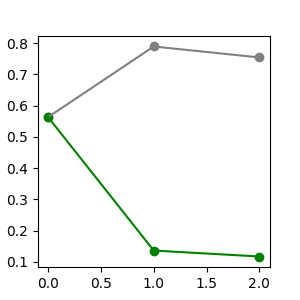

In [135]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig = plt.figure()
ax = fig.add_subplot(111)
ts = np.arange(0,3)
ax.plot(ts, same_day_vaf[:-1], color='gray')
ax.scatter(ts, same_day_vaf[:-1], color='gray')
ax.plot(ts, fixed_vaf_list[:-1], color='green')
ax.scatter(ts, fixed_vaf_list[:-1], color='green')

#ax.axis('off')
fig.set_size_inches(3, 3)

fig.savefig('/home/diya/Documents/rat-fes/results/sfn_poster/fig3.pdf', dpi=600)